# Stubhub API

This is a tutorial on using my Python wrapper for the stubhub inventory search API which enbales users to download pricing information from Stubhub.

In [1]:
from stubhub_scraper import St

import pandas as pd
import numpy as np

After importing the `stubhub_scraper` module you will have to provide your API credentials.

In [ ]:
## Enter user's API key, secret, and Stubhub login
app_token = ''
consumer_key = ''
consumer_secret = ''
stubhub_username = ''
stubhub_password = ''
    
st = St(app_token,consumer_key,consumer_secret,stubhub_username,stubhub_password)
# below is what a valid authorization response should look like

b'{"access_token":"254gce9e-3abd-3274-9d1f-13b7c3bf96b2","refresh_token":"1fdrf277-ac54-3d8d-b59b-58aa1482f7f4","scope":"default","token_type":"Bearer","expires_in":14846462}'

If authentication is succesfull you will see the message above with your access token. Obviously, above token is just random numbers. Now, you are ready to start downloading stubhub listings.

## Single event
To download listings for a single event use `get_listings` function which requires `eventid` and `pages` parameters. Lets get listings for the San Antonio at Golden State game on March 19th 2018 (it's Golden State's home game). You can find the event id in the event url on the stubhub website. By setting `pages` parameter to `True` the function will retrieve all listings. Setting it to `False` will retrieve 200 listings.

In [4]:
listings = st.get_listings(103138286,pages=True)
listings[0]

{'currentPrice': 46.9,
 'dirtyTicketInd': False,
 'listingId': 1314761532,
 'listingPrice': 37.0,
 'quantity': 2,
 'retrieveTime': '2018-03-17 20:21:08',
 'row': '14',
 'score': 0.0,
 'seatNumbers': '1;2',
 'sectionId': 127168,
 'sectionName': 'Balcony Corner 229',
 'sellerSectionName': '229',
 'zoneId': 7453,
 'zoneName': 'Balcony Corner'}

In [5]:
# Number of listings
len(listings)

298

`listings` is a list of dictionaries one of which you can see above. You can convert it to a dataframe and save as a csv.

In [6]:
listings = pd.DataFrame(listings)
listings.head()
# listings.to_csv('SpursvsWarriors 2018-3-19.csv')

,currentPrice,dirtyTicketInd,listingId,listingPrice,quantity,retrieveTime,row,score,seatNumbers,sectionId,sectionName,sellerSectionName,zoneId,zoneName
0,46.90,False,1314761532,37.00,2,2018-03-17 20:21:08,14,0.0,1;2,127168,Balcony Corner 229,229,7453,Balcony Corner
1,50.49,False,1314385851,39.99,2,2018-03-17 20:21:08,13,0.0,20;21,127149,Balcony Baseline 201,201,7454,Balcony Baseline
2,50.50,False,1284451304,40.00,2,2018-03-17 20:21:08,13,0.0,13;14,127156,Balcony Corner 204,Balcony Corner 204,7453,Balcony Corner
3,56.50,False,1314437278,45.00,3,2018-03-17 20:21:08,18,0.0,General Admission,127166,Balcony Corner 227,227,7453,Balcony Corner
4,57.70,False,1314744154,46.00,2,2018-03-17 20:21:08,15,0.0,7;8,127166,Balcony Corner 227,227,7453,Balcony Corner


## Multiple events
To download listings for multiple events use `get_listings_by_event` function that takes the `events` parameter which is a pandas dataframe with event name and id in the following format.

In [7]:
events = pd.read_csv('flyers events 2018.csv')
events

,Event,Eventid
0,Washington Capitals 3/18/2018,103045481
1,New York Rangers 3/22/2018,103045437
2,Boston Bruins 4/1/2018,103045191
3,Carolina Hurricanes 4/5/2018,103045229
4,New York Rangers 4/7/2018,103045439


Let's get listings for the rest of Philadelphia Flyers home games in 2017-2018 season.

In [8]:
flyers = st.get_listings_by_event(events)

Event: New York Rangers 4/7/2018: : 5it [00:22,  4.52s/it]    

Done getting listings by event.


In [9]:
flyers.head()

,currentPrice,dirtyTicketInd,listingId,listingPrice,quantity,retrieveTime,row,score,seatNumbers,sectionId,sectionName,sellerSectionName,zoneId,zoneName,Event,Date
0,58.30,False,1314733573,46.50,2,2018-03-17 20:21:20,12,0.0,7;8,30197,Mezzanine Goal 219A,UPPER:219A,7747,Mezzanine Goal,Washington Capitals 3/18/2018,3/18/2018
1,58.90,False,1314520843,47.00,2,2018-03-17 20:21:20,13,0.0,NA,30190,Mezzanine Goal 210A,UPPER:210A,7747,Mezzanine Goal,Washington Capitals 3/18/2018,3/18/2018
2,58.90,False,1314471076,47.00,2,2018-03-17 20:21:20,8,0.0,15;16,30199,Mezzanine Goal 221,UPPER:221,7747,Mezzanine Goal,Washington Capitals 3/18/2018,3/18/2018
3,58.90,False,1314718454,47.00,2,2018-03-17 20:21:20,11,0.0,NA,30181,Mezzanine Goal 205,UPPER:205,7747,Mezzanine Goal,Washington Capitals 3/18/2018,3/18/2018
4,60.09,False,1314008638,47.99,2,2018-03-17 20:21:20,11,0.0,11;12,30193,Mezzanine Goal 217,UPPER:217,7747,Mezzanine Goal,Washington Capitals 3/18/2018,3/18/2018


In [11]:
pd.unique(flyers['Event'])

array(['Washington Capitals 3/18/2018', 'New York Rangers 3/22/2018',
       'Boston Bruins 4/1/2018', 'Carolina Hurricanes 4/5/2018',
       'New York Rangers 4/7/2018'], dtype=object)

In [12]:
avg_price = pd.pivot_table(flyers, values='listingPrice', index=['Event'], aggfunc=np.mean)
avg_price

,listingPrice
Event,
Boston Bruins 4/1/2018,123.045885
Carolina Hurricanes 4/5/2018,103.606022
New York Rangers 3/22/2018,109.096023
New York Rangers 4/7/2018,179.073376
Washington Capitals 3/18/2018,109.177534


We can sort by date and plot the average listing price.

In [13]:
avg_price['Date'] = avg_price.index.to_series().apply(lambda x: x.split(' ')[-1])
avg_price = avg_price.sort_values(by=['Date'])
avg_price

,listingPrice,Date
Event,,
Washington Capitals 3/18/2018,109.177534,3/18/2018
New York Rangers 3/22/2018,109.096023,3/22/2018
Boston Bruins 4/1/2018,123.045885,4/1/2018
Carolina Hurricanes 4/5/2018,103.606022,4/5/2018
New York Rangers 4/7/2018,179.073376,4/7/2018


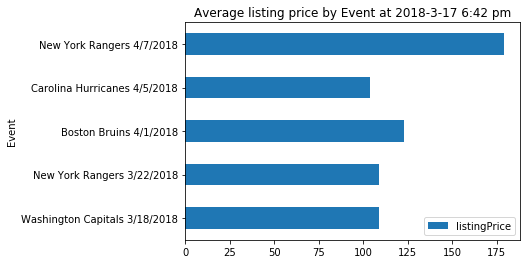

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

avg_price.plot.barh(title='Average listing price by Event at 2018-3-17 6:42 pm')

Let's also look at the number of listings.

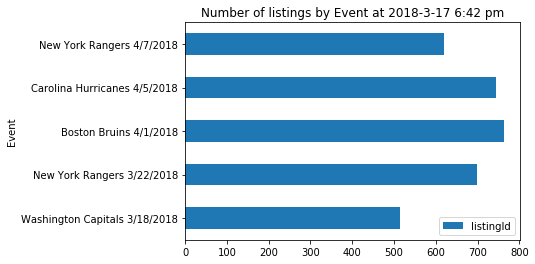

In [15]:
listings_number = pd.pivot_table(flyers, values='listingId', index=['Event'], aggfunc=len)
listings_number['Date'] = listings_number.index.to_series().apply(lambda x: x.split(' ')[-1])
listings_number = listings_number.sort_values(by=['Date'])
listings_number.plot.barh(title='Number of listings by Event at 2018-3-17 6:42 pm')

Below is a good visual to see how spread out the prices by event are.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1137b6518>,
      dtype=object)

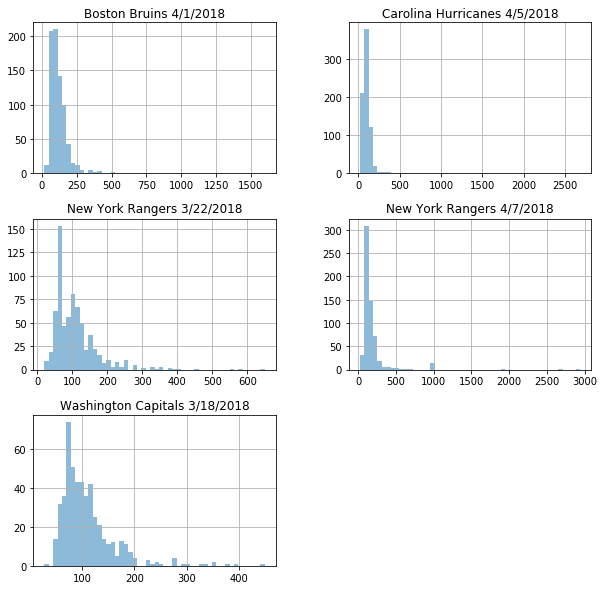

In [16]:
flyers.pivot(index=None, columns='Event',values='listingPrice')\
.hist(alpha=0.5,bins=50,figsize=(10,10))

## Heatmap

In [11]:
def sort_mixed_list(lst):
    # sort mixed list
    ret = []
    for i in lst:
        try:
            ret.append(int(i))
        except:
            ret.append(i)
    ret = sorted(ret, key=lambda x: (isinstance(x, str), x))
    return [str(i) for i in ret]

df = pd.read_csv('data/flyers listings.csv')
df = df.loc[(df['Event']=='Washington Capitals 3/18/2018'),:]
# df = pd.DataFrame(st.get_listings(103526621,pages=True))

dff_price = pd.pivot_table(df, values='listingPrice', 
                     index=['sectionName'], columns=['row'], 
                     aggfunc=np.mean)

dff_quantity = pd.pivot_table(df, values='quantity', 
                     index=['sectionName'], columns=['row'], 
                     aggfunc=np.mean)

dff = dff_price.div(dff_quantity)

cols = sort_mixed_list(list(dff.columns.values))
dff = dff[cols]
dff_quantity = dff_quantity[cols]

In [13]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

x = ['(' + str(i) + ')' for i in dff.columns.values]
y = dff.index
z = dff.values.tolist()
q = dff_quantity.values.tolist()

hovertext = list()
for yi, yy in enumerate(y):
    hovertext.append(list())
    for xi, xx in enumerate(x):
        hovertext[-1].append('''Row/Item: {}<br />Section: {}<br />Avg. Price: ${:,.2f}<br />Avg. Quantity: {:,.0f}'''
                             .format(xx, yy, z[yi][xi],q[yi][xi]))


trace = go.Heatmap(z = dff.values.tolist(),
                   y = y,
                   x = x,
                   hoverinfo='text',
                   text=hovertext,
                   colorscale='Viridis',
                   reversescale= True)

layout = go.Layout(xaxis=dict(categoryorder='array', categoryarray=list(dff.columns.values), type="category", side="top"),
                   yaxis=dict(tickfont=dict(size=11)),
                   margin=go.Margin(l=200,r=50,b=100,t=150,pad=4),
                   height = 1000,
                  # width = 1500,
                   title = 'Average Price Per Seat by Section and Row/Item')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='basic-heatmap')

## Reference

**`get_listings(eventid, pages=False)`** - Get listings using Stubhub API.

Parameters:
  - `eventid` (int) - eventid taken from the Stubhub event url.
  - `pages` (bool) - if True paginate to get all listings. If False get 200 listings.
  
**`get_listings_by_event(events)`** - Given the list of events and event ids retrieve all the listings for each event .

Parameters:
  - `events` (pandas DataFrame) - a pandas dataframe of events and event ids taken from stubhub.
 

## Resources

  - https://developer.stubhub.com/docs/StubHub+API+Developers+Guide.html
  - http://ozzieliu.com/2016/06/21/scraping-ticket-data-with-stubhub-api/
  - https://stubhubapi.zendesk.com/hc/en-us/articles/220922687-Inventory-Search